# Get data from Spotify

This part relies on Spotipy library access Spotify data using Spotify's RESTfuls API.

In [1]:
# load dependencies
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

# To access the playlist

In [2]:
# get the credentials
credentials = json.load(open("authorization.json"))
client_id = credentials["client_id"]
client_secret = credentials["client_secret"]

# Accessing the playlist

In [3]:
# load the json file
playlist_index = 0  # the first playlist is a meditation music playlist
playlists = json.load(open("playlists_like_dislike.json"))

In [4]:
playlists

[{'uri': 'spotify:playlist:37i9dQZF1DX1T2fEo0ROQ2', 'like': True},
 {'uri': 'spotify:playlist:6W0sKut7XZL7V6wTjR52R0', 'like': False},
 {'uri': 'spotify:playlist:4wibn1cPPP9m7WPiv7KF5Z', 'like': True},
 {'uri': 'spotify:playlist:37i9dQZF1E4ozsSPtAR9zm', 'like': True},
 {'uri': 'spotify:playlist:5COFpNFakkf6s0e0Oq967L', 'like': True},
 {'uri': 'spotify:playlist:317O0e8iWJLClLGDKtieRe', 'like': False},
 {'uri': 'spotify:playlist:37i9dQZF1E4qQ00I1Jm1ay', 'like': False}]

In [5]:
# get the first uri and like
playlist_uri = playlists[playlist_index]["uri"]
like = playlists[playlist_index]["like"]

In [6]:
# to set up Spotify obj
client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret=client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Get information of tracks

In [7]:
# the uri playlist_id 
playlist_id = playlist_uri.split(":")[2]
playlist_id

'37i9dQZF1DX1T2fEo0ROQ2'

In [8]:
# get information of tracks
results = spotify.playlist(playlist_id, "tracks")
results

{'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX1T2fEo0ROQ2/tracks?offset=0&limit=100&additional_types=track',
  'items': [{'added_at': '2020-09-30T12:31:23Z',
    'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
     'href': 'https://api.spotify.com/v1/users/',
     'id': '',
     'type': 'user',
     'uri': 'spotify:user:'},
    'is_local': False,
    'primary_color': None,
    'track': {'album': {'album_type': 'single',
      'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Ne3d3mvmU8z83OHnVFSxu'},
        'href': 'https://api.spotify.com/v1/artists/1Ne3d3mvmU8z83OHnVFSxu',
        'id': '1Ne3d3mvmU8z83OHnVFSxu',
        'name': 'Leyton Miller',
        'type': 'artist',
        'uri': 'spotify:artist:1Ne3d3mvmU8z83OHnVFSxu'}],
      'available_markets': ['AD',
       'AE',
       'AL',
       'AR',
       'AT',
       'AU',
       'BA',
       'BE',
       'BG',
       'BH',
       'BO',
       'BR',
      

# Get the details of the tracks

In [10]:
playlist_tracks_data = results["tracks"]
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for item in playlist_tracks_data["items"]:
    playlist_tracks_id.append(item["track"]["id"])
    playlist_tracks_titles.append(item["track"]["name"])
    
    # there are multiple artists sometimes
    artist_list = []
    for sublist in item["track"]["artists"]:
        artist_list.append(sublist["name"])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

# Extract audio features

Spotify has given each song/ track unique attributee eg loudness, etc. The information is available https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/.

In [12]:
features = spotify.audio_features(playlist_tracks_id)
type(features[1])
# turn it into dataframe
import numpy as np
import pandas as pd
features_df = pd.DataFrame(data = features, columns=features[0].keys())
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,audio_features,5WmNIkqdsm7rQeFowj0lSX,spotify:track:5WmNIkqdsm7rQeFowj0lSX,https://api.spotify.com/v1/tracks/5WmNIkqdsm7r...,https://api.spotify.com/v1/audio-analysis/5WmN...,176500,4
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,audio_features,7ze0KZupaUbhQjpXpFqJFM,spotify:track:7ze0KZupaUbhQjpXpFqJFM,https://api.spotify.com/v1/tracks/7ze0KZupaUbh...,https://api.spotify.com/v1/audio-analysis/7ze0...,221413,4
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,audio_features,0hO3qOVM7c0Gu532K43dGZ,spotify:track:0hO3qOVM7c0Gu532K43dGZ,https://api.spotify.com/v1/tracks/0hO3qOVM7c0G...,https://api.spotify.com/v1/audio-analysis/0hO3...,129326,4
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,audio_features,6U3dRi6YtXyjuogL1Mntm4,spotify:track:6U3dRi6YtXyjuogL1Mntm4,https://api.spotify.com/v1/tracks/6U3dRi6YtXyj...,https://api.spotify.com/v1/audio-analysis/6U3d...,188026,3
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,audio_features,1WYZio6NAhl2ykJs2jBXuO,spotify:track:1WYZio6NAhl2ykJs2jBXuO,https://api.spotify.com/v1/tracks/1WYZio6NAhl2...,https://api.spotify.com/v1/audio-analysis/1WYZ...,201000,4


# Merging the dataframe together with other details

In [13]:
features_df["Title"] = playlist_tracks_titles
features_df["first_artist"] = playlist_tracks_first_artists
features_df["all_artists"] = playlist_tracks_artists
features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'Title', 'first_artist', 'all_artists'],
      dtype='object')

In [14]:
features_df = features_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','id'
                           ,'Title', 'first_artist', 'all_artists', 'duration_ms', 'time_signature']]
features_df.reset_index()
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,Title,first_artist,all_artists,duration_ms,time_signature
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,5WmNIkqdsm7rQeFowj0lSX,Changing Places,Leyton Miller,[Leyton Miller],176500,4
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,7ze0KZupaUbhQjpXpFqJFM,Message from the Other Lands,Lama House,[Lama House],221413,4
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,0hO3qOVM7c0Gu532K43dGZ,Nocturno,Henrietta Dubois,[Henrietta Dubois],129326,4
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,6U3dRi6YtXyjuogL1Mntm4,Older,Lionheart,[Lionheart],188026,3
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,1WYZio6NAhl2ykJs2jBXuO,Frangibility,Spheres,[Spheres],201000,4


# Analyzing data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline  

/home/han/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text major ticklabel objects>)

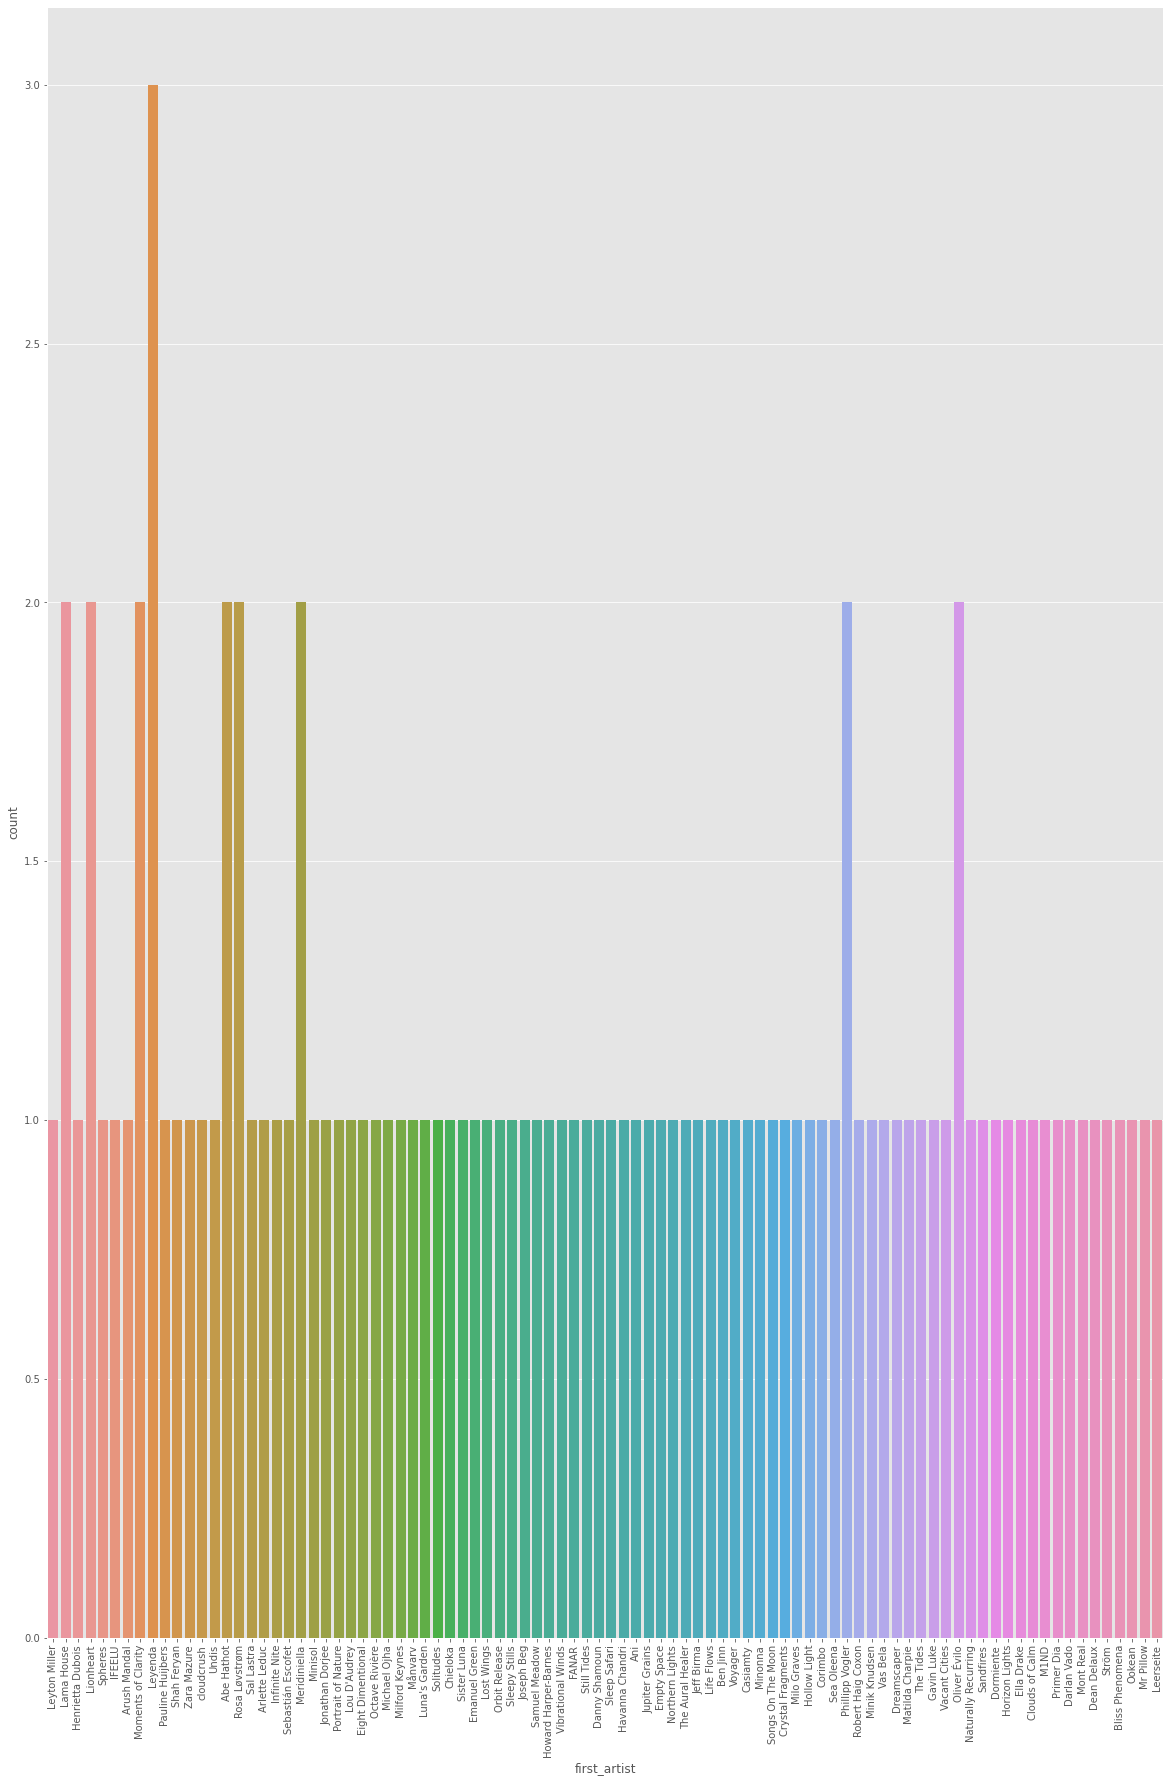

In [16]:
# see which artist has most songs
plt.style.use("ggplot")
plt.figure(figsize =(20,30))
sb.countplot(features_df["first_artist"])
plt.xticks(rotation=90)

# Spotify audio analysis

In [17]:
# could take time to fetch and process
num_bars = []
num_sections = []
num_segments = []

for i in range(len(features_df["id"])):
    analysis = spotify.audio_analysis(features_df.iloc[i]["id"])
    num_bars.append(len(analysis["bars"]))
    num_sections.append(len(analysis["sections"]))
    num_segments.append(len(analysis["segments"]))

(array([ 2.,  4.,  7.,  6., 17.,  9., 11., 15.,  5.,  7.,  5.,  6.,  3.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 160.  ,  221.28,  282.56,  343.84,  405.12,  466.4 ,  527.68,
         588.96,  650.24,  711.52,  772.8 ,  834.08,  895.36,  956.64,
        1017.92, 1079.2 , 1140.48, 1201.76, 1263.04, 1324.32, 1385.6 ,
        1446.88, 1508.16, 1569.44, 1630.72, 1692.  ]),
 <a list of 25 Patch objects>)

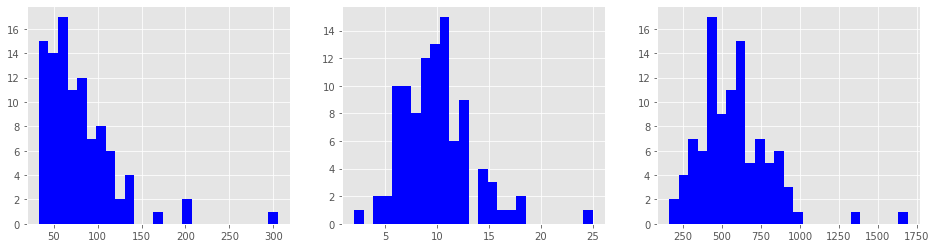

In [18]:
# plot them
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(num_bars, bins=25, color="blue")
plt.subplot(1,3,2)
plt.hist(num_sections, bins=25, color="blue")
plt.subplot(1,3,3)
plt.hist(num_segments, bins=25, color="blue")

In [19]:
# adding the extra information to the dataframe
features_df["num_bars"] = num_bars
features_df["num_sections"] = num_sections
features_df["num_segments"] = num_segments
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,Title,first_artist,all_artists,duration_ms,time_signature,num_bars,num_sections,num_segments
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,5WmNIkqdsm7rQeFowj0lSX,Changing Places,Leyton Miller,[Leyton Miller],176500,4,43,9,449
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,7ze0KZupaUbhQjpXpFqJFM,Message from the Other Lands,Lama House,[Lama House],221413,4,45,10,537
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,0hO3qOVM7c0Gu532K43dGZ,Nocturno,Henrietta Dubois,[Henrietta Dubois],129326,4,65,7,403
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,6U3dRi6YtXyjuogL1Mntm4,Older,Lionheart,[Lionheart],188026,3,87,10,637
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,1WYZio6NAhl2ykJs2jBXuO,Frangibility,Spheres,[Spheres],201000,4,107,11,655


# Move columns around

In [20]:
features_df = features_df[['Title','first_artist','all_artists','danceability',
 'energy', 'key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence',
 'tempo','id','duration_ms','time_signature','num_bars','num_sections','num_segments']]
features_df.head()

,Title,first_artist,all_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,num_bars,num_sections,num_segments
0,Changing Places,Leyton Miller,[Leyton Miller],0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,5WmNIkqdsm7rQeFowj0lSX,176500,4,43,9,449
1,Message from the Other Lands,Lama House,[Lama House],0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,7ze0KZupaUbhQjpXpFqJFM,221413,4,45,10,537
2,Nocturno,Henrietta Dubois,[Henrietta Dubois],0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,0hO3qOVM7c0Gu532K43dGZ,129326,4,65,7,403
3,Older,Lionheart,[Lionheart],0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,6U3dRi6YtXyjuogL1Mntm4,188026,3,87,10,637
4,Frangibility,Spheres,[Spheres],0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,1WYZio6NAhl2ykJs2jBXuO,201000,4,107,11,655


In [21]:
features_df.shape[0]

100

# Save dataframe

In [ ]:
features_df.to_csv("playlist_" + str(playlist_index) + ".csv",index="false")

# More analysis

In [22]:
features_df.head()

,Title,first_artist,all_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,num_bars,num_sections,num_segments
0,Changing Places,Leyton Miller,[Leyton Miller],0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,5WmNIkqdsm7rQeFowj0lSX,176500,4,43,9,449
1,Message from the Other Lands,Lama House,[Lama House],0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,7ze0KZupaUbhQjpXpFqJFM,221413,4,45,10,537
2,Nocturno,Henrietta Dubois,[Henrietta Dubois],0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,0hO3qOVM7c0Gu532K43dGZ,129326,4,65,7,403
3,Older,Lionheart,[Lionheart],0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,6U3dRi6YtXyjuogL1Mntm4,188026,3,87,10,637
4,Frangibility,Spheres,[Spheres],0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,1WYZio6NAhl2ykJs2jBXuO,201000,4,107,11,655


## Normalisation of loudness and tempo

The values for tempo are above 1 and loudness are outside of the range of 0 - 1. The values need to be normalised so that the plot for them could be done.

In [23]:
cols = ["tempo"]
features_df[["tempo_norm"]] = features_df[cols].apply(lambda x: (x-x.min())/(x.max()-x.min()))
features_df.head()

,Title,first_artist,all_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,id,duration_ms,time_signature,num_bars,num_sections,num_segments,tempo_norm
0,Changing Places,Leyton Miller,[Leyton Miller],0.163,0.0363,9,-28.038,1,0.0422,0.971,...,0.0937,0.0751,60.027,5WmNIkqdsm7rQeFowj0lSX,176500,4,43,9,449,0.078589
1,Message from the Other Lands,Lama House,[Lama House],0.290,0.3320,10,-13.058,1,0.0302,0.539,...,0.1900,0.0374,49.928,7ze0KZupaUbhQjpXpFqJFM,221413,4,45,10,537,0.000000
2,Nocturno,Henrietta Dubois,[Henrietta Dubois],0.326,0.2000,4,-20.150,0,0.0386,0.991,...,0.0867,0.4190,125.385,0hO3qOVM7c0Gu532K43dGZ,129326,4,65,7,403,0.587196
3,Older,Lionheart,[Lionheart],0.361,0.1220,2,-11.416,0,0.0364,0.983,...,0.0870,0.2770,86.292,6U3dRi6YtXyjuogL1Mntm4,188026,3,87,10,637,0.282980
4,Frangibility,Spheres,[Spheres],0.115,0.0664,1,-26.363,1,0.0405,0.958,...,0.0817,0.0380,159.506,1WYZio6NAhl2ykJs2jBXuO,201000,4,107,11,655,0.852721


In [27]:
features_df[["loudness_norm"]] = features_df[["loudness"]].apply(lambda x: (x-x.min())/(x.max()-x.min()))
features_df.head()
# closer the value of loudness_norm is to 1, the louder it is

,Title,first_artist,all_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,id,duration_ms,time_signature,num_bars,num_sections,num_segments,tempo_norm,loudness_norm
0,Changing Places,Leyton Miller,[Leyton Miller],0.163,0.0363,9,-28.038,1,0.0422,0.971,...,0.0751,60.027,5WmNIkqdsm7rQeFowj0lSX,176500,4,43,9,449,0.078589,0.424107
1,Message from the Other Lands,Lama House,[Lama House],0.290,0.3320,10,-13.058,1,0.0302,0.539,...,0.0374,49.928,7ze0KZupaUbhQjpXpFqJFM,221413,4,45,10,537,0.000000,0.943111
2,Nocturno,Henrietta Dubois,[Henrietta Dubois],0.326,0.2000,4,-20.150,0,0.0386,0.991,...,0.4190,125.385,0hO3qOVM7c0Gu532K43dGZ,129326,4,65,7,403,0.587196,0.697398
3,Older,Lionheart,[Lionheart],0.361,0.1220,2,-11.416,0,0.0364,0.983,...,0.2770,86.292,6U3dRi6YtXyjuogL1Mntm4,188026,3,87,10,637,0.282980,1.000000
4,Frangibility,Spheres,[Spheres],0.115,0.0664,1,-26.363,1,0.0405,0.958,...,0.0380,159.506,1WYZio6NAhl2ykJs2jBXuO,201000,4,107,11,655,0.852721,0.482140


danceability        0.192451
energy              0.091133
loudness_norm       0.559945
mode                0.650000
speechiness         0.040011
acousticness        0.913877
instrumentalness    0.907690
liveness            0.116190
valence             0.086857
tempo_norm          0.350630
dtype: float64
[0.192451, 0.09113310000000001, 0.5599445657069605, 0.65, 0.04001099999999999, 0.9138769999999999, 0.9076900000000001, 0.11619, 0.086857, 0.3506304083919568, 0.192451]


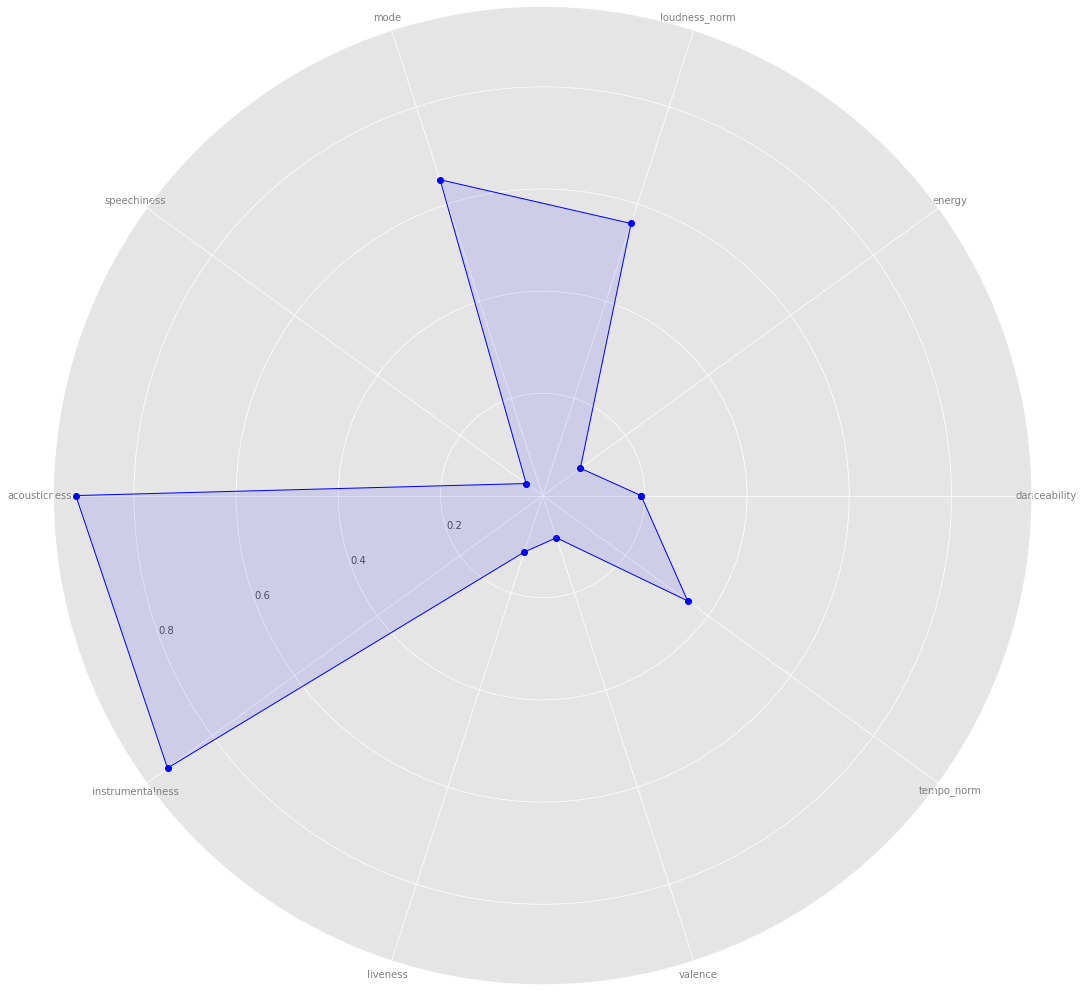

In [39]:
# to plot a radar chart
# number of variables 
variables = ['danceability', 'energy', 'loudness_norm', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo_norm']
num_var = len(variables)

# get the mean
mean_val = features_df[variables].mean().tolist()
print(features_df[variables].mean())

# first value needs to be repeated to close the circular graph
mean_val += mean_val[:1]
print(mean_val)

# angle between each axis 
from math import pi
angles = [n/float(num_var) * 2 * pi for n in range(num_var)]
angles += angles[:1]

# initialising spider plot
plt.figure(figsize=(18,18))  # size of the plot
ax = plt.subplot(111,polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], variables, color='grey', size=10)

# Draw ylabels
ax.set_rlabel_position(200)

# plot data
ax.plot(angles, mean_val, "o-", linewidth=1, linestyle='solid', color="blue")

# fill the graph
ax.fill(angles, mean_val, 'b', alpha=0.1, facecolor="blue")